# CartoGRAPHs
## A Framework for Interpretable Network Visualizations 

----------
+ Network Layouts involve : 
    + local 
    + global 
    + importance
    + functional 


+ Network Categories involve : 
    + 2D Portrait
    + 3D Portrait
    + Topographic Map
    + Geodesic Map

----------

In [1]:
from cartographs_main import *

_____
# 1 | DEFINE NETWORK GRAPH
_____

In [2]:
#####################
# SELECT AN ORGANISM 
#####################

#rganism = 'yeast'
organism = 'human'

G = load_graph(organism)

d_centralities = load_centralities(G, organism)
df_centralities = pd.DataFrame(d_centralities).T
essential_genes,non_ess_genes,notdefined_genes = load_essentiality(G, organism)

d_gene_sym = load_genesymbols(G, organism)
l_features = list(d_gene_sym.values())

In [3]:
print('Number of nodes i.e. genes: %s' %len(list(G.nodes())))
print('Number of edges: %s'%len(list(G.edges())))
print('Network density: %.1f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

#print('symbol list length:', len(l_features))
#print('dict. of centr. length:', len(d_centralities))
#print('Essentiality loaded (all genes):', len(essential_genes)+len(non_ess_genes)+len(notdefined_genes))

Number of nodes i.e. genes: 16376
Number of edges: 309355
Network density: 0.2%


In [4]:
# Human / Disease specific 

d_gene_do = pickle.load( open( "input/d_gene_do.pkl", "rb" ) )
d_do_genes = pickle.load( open( "input/d_do_genes.pkl", "rb" ) )
d_do_names = pickle.load( open( "input/DO_names.pkl", "rb" ) )
d_names_do = {y:x for x,y in d_do_names.items()}

_____
# 2 | LOAD AND SELECT ONF OF THE FOLLOWING FEATURES
_____

In [5]:
#######################################
# Select precalculated layout matrix
#######################################

#netlayout = 'local'
#netlayout = 'global'
netlayout = 'importance'
#netlayout = 'funct-bio'
#netlayout = 'funct-mol'
#netlayout = 'funct-cel'
#netlayout = 'funct-dis'

feature = netlayout
DM = load_datamatrix(G,organism, netlayout)

genes = []
for i in DM.index:
    if str(i) in G.nodes():
        genes.append(str(i))
    
genes_rest = [] 
for g in G.nodes():
    if g not in genes:
        genes_rest.append(g)

____________
# 3 | SET VISUAL PRE-SETTINGS
____________

### CHOOSING GENERAL NODE- AND EDGE VISUAL PARAMETERS

In [ ]:
#################
# E D G E S
#################

edge_width = 0.1
edge_colorlight = '#d3d3d3' # 'lightgrey'
edge_colordark = '#696969' 
opacity_edges = 0.1 


#################
# N O D E S
#################

opacity_nodes = 0.8
node_edge_col = '#696969' 

scale_factor = 0.1
size = list(draw_node_degree(G, scale_factor).values())
scale_factor3D = 0.1
size3d = list(draw_node_degree_3D(G, scale_factor3D).values())

nodesglow_diameter = 8.0
nodesglow_transparency = 0.01 # 0.01

### CHOOSING NODE COLOR SETTINGS

#### OPT 1 | DICTIONARY INPUT

In [ ]:
# Text identifier for file output name
color_method = 'clos'

# choose a dictionary 
# example: 
d_clos = {}
for k,v in d_centralities.items():
    d_clos[k] = v[1]

# set dictionary for coloring 
d_nodecol = d_clos 

# choose a color palette 
col_pal = 'YlOrRd'

# assigning colors to nodes based on previous settings
d_colours = color_nodes_from_dict(G, d_nodecol, palette = col_pal)
colours = list(d_colours.values())

edge_color = '#d3d3d3'

#### OPT 2 | HUBS

In [42]:
# Text identifier for file output name
color_method = 'hubs'

# Choose color of hubs 
node_col = '#008a00' 
neigh_col_nodes = '#B9D770' 

# Identify hubs (using tresholds) 
min_treshold = 1000
max_treshold = 5000
hubs,neighs = get_hubs(G, max_treshold, min_treshold)
colours = list(color_nodes_hubs(G, hubs, neighs, node_col, neigh_col_nodes).values())
print('Selected No. of Hubs: ', len(hubs))

# Get edges from hubs 
d_edge_col_ = color_edges_from_nodelist(G, list(hubs.keys()), node_col)

# Get rest edges 
rest_col_edges = '#d3d3d3'
d_rest_edges={}
for e in G.edges():
    if e not in d_edge_col_.keys():
        d_rest_edges[e] = rest_col_edges

d_all_edges = {**d_edge_col_, **d_rest_edges}
d_all_edges_sort = {key:d_all_edges[key] for key in G.edges()}
edge_color = list(d_all_edges_sort.values())

Selected No. of Hubs:  12


#### OPT 3 | ESSENTIAL NODES

In [7]:
# Text identifier for file output name
color_method = 'essent'

# Choose colors 
node_col = '#00abff' 
undefined_col = '#d3d3d3'
rest_col_nodes = '#d3d3d3'
rest_col_edges = '#f5f5f5'

d_col_all_sorted = color_nodes_from_list(G, essential_genes, node_col)
colours = list(d_col_all_sorted.values())

# Choose edges to highlight that link inbetween 2 essential genes only 
# or if one essential node is enough to produce a highlighted link 
d_edge_col_ = color_edges_from_nodelist_and(G, essential_genes, node_col)

# Rest edges 
d_rest_edges={}
for e in G.edges():
    if e not in d_edge_col_.keys():
        d_rest_edges[e] = rest_col_edges

d_all_edges = {**d_edge_col_, **d_rest_edges}
d_all_edges_sort = {key:d_all_edges[key] for key in G.edges()}
edge_color = list(d_all_edges_sort.values())

#### OPT 4 | A SPECIFIC DISEASE (for homo sapiens only)

In [367]:
# ----------------------------------------------------        
# get disease categories
# ----------------------------------------------------        
disease_categories = {}
for d_name in d_names_do.keys():
    #if d_name.find(disease_category) != -1:
        try:
            disease_categories[d_name,d_names_do[d_name]]=len(d_do_genes[d_names_do[d_name]])
            #print('specific disease: %s (%s) ; # associated genes: %s' %(d_name,d_names_do[d_name],len(d_do_genes[d_names_do[d_name]])))
        except:
            pass

# ----------------------------------------------------        
# search specific term + count of genes associated with disease 
# ----------------------------------------------------   
min_diseasegenes = 1
max_diseasegenes = 50
search_term = "spondylitis"

for k,v in disease_categories.items():
    if v >= min_diseasegenes and v<= max_diseasegenes and search_term in k[0]:
        print(k,v)

('ankylosing spondylitis', 'DOID:7147') 12


In [96]:
# Choose Disease 
disease_category = 'cancer'
# Text identifier for file output name
color_method = disease_category

# Get Disease genes 
disease_genes = get_disease_genes(G, d_names_do, d_do_genes, disease_category)

# Node colors
node_col = '#d21404' # 'red'
rest_col_edges = '#f5f5f5' # 'whitesmoke'
rest_col_nodes = '#d3d3d3' # 'lightgrey'
colours = color_nodes_from_genelist(G, disease_genes, node_col, rest_col_nodes)

# Edge colors - based on gene list of selection 
d_edge_col_ = color_edges_from_nodelist(G, disease_genes, node_col)

d_rest_edges={}
for e in G.edges():
    if e not in d_edge_col_.keys():
        d_rest_edges[e] = rest_col_edges
        
d_all_edges = {**d_edge_col_, **d_rest_edges}
d_all_edges_sort = {key:d_all_edges[key] for key in G.edges()}
edge_color = list(d_all_edges_sort.values())

#### OPT 5 | MORE THAN 1 SPECIFIC DISEASES (for homo sapiens only)

In [102]:
# Text identifier for file output name
color_method = 'fourdiseases'

# Choose diseases to be highlighted 
disease_one = 'carcinoma' #'leukemia' ###  
disease_two = 'schizophrenia' ###
disease_three = 'myopathy' # 'epilepsy' ###
disease_four = 'breast cancer'#'cardiomyopathy' ###

disease_genes_one = get_disease_genes(G, d_names_do, d_do_genes, disease_one)
disease_genes_two = get_disease_genes(G, d_names_do, d_do_genes, disease_two)
disease_genes_three = get_disease_genes(G, d_names_do, d_do_genes, disease_three)
disease_genes_four = get_disease_genes(G, d_names_do, d_do_genes, disease_four)

node_col_one = '#ff9a00' #orange
node_col_two = '#ffe700' #yellow
node_col_three = '#e50000' #red
node_col_four = '#a10000' #dark red

rest_col_edges = '#d3d3d3'
rest_col_nodes = '#d3d3d3'# '#696969' 

d_col_one = color_nodes(disease_genes_one, node_col_one)
d_col_two = color_nodes(disease_genes_two, node_col_two)
d_col_three = color_nodes(disease_genes_three, node_col_three)
d_col_four = color_nodes(disease_genes_four, node_col_four)


# Node colors 
d_col_all = {**d_col_one, **d_col_two, **d_col_three, **d_col_four}

d_rest = {}
for g in G.nodes():
    if g not in d_col_all.keys():
        d_rest[g] = rest_col_nodes #'d3d3d3' #'696969', #'dimgrey' # 'rgba(50,50,50,0.5)'

d_col_all_unsort = {**d_col_all, **d_rest}
d_col_all_sorted = {key:d_col_all_unsort[key] for key in G.nodes()}
colours = list(d_col_all_sorted.values())


# Edge colors 

d_edge_col_one = color_edges_from_nodelist_specific(G, disease_genes_one, node_col_one)
d_edge_col_two = color_edges_from_nodelist_specific(G, disease_genes_two, node_col_two)
d_edge_col_three = color_edges_from_nodelist_specific(G, disease_genes_three, node_col_three)
d_edge_col_four = color_edges_from_nodelist_specific(G, disease_genes_four, node_col_four)


d_edge_col_ = {**d_edge_col_one,**d_edge_col_two,**d_edge_col_three,**d_edge_col_four}

d_rest_edges={}
for e in G.edges():
    if e not in d_edge_col_.keys():
        d_rest_edges[e] = rest_col_edges
        
d_all_edges = {**d_edge_col_, **d_rest_edges}
d_all_edges_sort = {key:d_all_edges[key] for key in G.edges()}
edge_color = list(d_all_edges_sort.values())

#### OPT 6 | SPECIFIC GENE LIST (for homo sapiens only)

In [ ]:
#################
# EXAMPLE 1: PATIENT VARIANTS + SEEDS 
#################

# Text identifier for file output name
color_method = 'var_seeds'

# Load Gene Information for Gene lists 
variants = pd.read_csv('input/julias_variants_mod.txt')
variant_list = [str(i) for i in list(variants['variants'])]
variant_sym = pd.read_csv('input/julias_variants_sym.txt')
genes_sym_list = [str(i) for i in list(variant_sym['variant_sym'])]
d_gene_sym_variants = dict(zip(variant_list,genes_sym_list))

df_seeds = pd.read_csv('input/seeds_from_genelists.txt')
df_seeds.columns = ['seeds']
df_seeds_z = pd.read_csv('input/seeds_from_zNumbers.txt', sep='\n')
seeds_list = [str(i) for i in list(df_seeds['seeds'])]

d_seeds_idsym = {}
for k,v in d_gene_sym.items():
    for i in seeds_list:
        if v == i:
            d_seeds_idsym[k]=i
seed_list = list(d_seeds_idsym.keys())

genes_list = variant_list+seed_list
# or select any other gene list with gene EntrezIDs

#################
# EXAMPLE 2:  AUTOCORE 
#################

# Text identifier for file output name
#color_method = 'autocore' 

#G_AC = nx.read_edgelist("input/autocore_edgelist.txt")
#genes_list = list(G_AC.nodes()

In [ ]:
# Choose List of Genes (by EntrezID) 
genes_list = variant_list+seed_list # gene list from Example 1 above

# Choose colors 
node_col = '#8b0000' #'red' # '#FF0000'
rest_col_edges = '#f5f5f5' # 'whitesmoke'
rest_col_nodes = '#d3d3d3' # 'lightgrey'


# List of Input Gene list to highlist 
l_genes = genes_list
colours = color_nodes_from_list(G, l_genes, node_col)
d_edge_col_ = color_edges_from_nodelist(G, l_genes, node_col)

In [83]:
#################
#
# SPECIFIC GENES 
#
#################

# Text identifier for file output name
color_method = 'genes'

# Choose gene with "Gene symbol"
genesym_list = ['APP', 'ELAVL1']

d_idsym = {}
for k,v in d_gene_sym.items():
    for i in genesym_list:
        if v == i:
            d_idsym[k]=i
l_genes = list(d_idsym.keys())

d_edge_col_ = color_edges_from_genelist(G, l_genes, 'dimgrey')

#### OPT 7 | DISEASE MODULES / PAIRS (for homo sapiens only)

In [142]:
# disease relationships tests
# 1 ('parapsoriasis', 'DOID:9088') 54 or ('psoriasis', 'DOID:8893') 55
# 2 ('vasculitis', 'DOID:865') 39

# 1 ('alcoholic liver cirrhosis', 'DOID:14018') 17
# 2 ('ankylosing spondylitis', 'DOID:7147') 12

In [157]:
# Text identifier for file output name
color_method = 'dismod'

# Choose diseases to be highlighted 
disease_one = 'parapsoriasis' #"Graves' disease" # 'asthma' 
disease_two = 'vasculitis' #'celiac disease'

disease_genes_one = get_disease_genes(G, d_names_do, d_do_genes, disease_one)
disease_genes_two = get_disease_genes(G, d_names_do, d_do_genes, disease_two)
print('Number of disease genes: ', disease_one,':', len(disease_genes_one))
print('Number of disease genes: ', disease_two,':', len(disease_genes_two))


# N O D E S
node_col_one = '#FFCA06' #light-orange
node_col_two = '#06D2FF' # light-blue  '#01F3FF' #turquoise
node_col_overlap ='#093DFF' #darkblue
rest_col_nodes = '#F4F4F4' # '#696969' 

d_col_one = color_nodes(disease_genes_one, node_col_one)
d_col_two = color_nodes(disease_genes_two, node_col_two)

d_col_both = d_col_one.keys() & d_col_two.keys()
d_col_overlap = {}
for node in d_col_both:
    d_col_overlap[node] = node_col_overlap 
    
d_col_all = {**d_col_one, **d_col_two,**d_col_overlap}

d_rest = {}
for g in G.nodes():
    if g not in d_col_all.keys():
        d_rest[g] = rest_col_nodes #'d3d3d3' #'696969', #'dimgrey' # 'rgba(50,50,50,0.5)'
d_col_all_unsort = {**d_col_all, **d_rest}
d_col_all_sorted = {key:d_col_all_unsort[key] for key in G.nodes()}
colours = list(d_col_all_sorted.values())


# E D G E S 
edge_col_mix = '#0E9412' #green
#rest_col_edges = '#F4F4F4' 

# color edges in between disease only 
d_edge_col_one = color_edges_from_nodelist_and(G, disease_genes_one, node_col_one)
d_edge_col_two = color_edges_from_nodelist_and(G, disease_genes_two, node_col_two)
d_edge_col_both = {**d_edge_col_one, **d_edge_col_two}


# color edges from one disease to another
d_edge_col_mix = color_edges_from_nodelist_and(G, list(disease_genes_one)+list(disease_genes_two), edge_col_mix)
d_edge_col_mix_drop = {}
for k,v in d_edge_col_mix.items():
    if k not in d_edge_col_both.keys():
        d_edge_col_mix_drop[k]=v

Number of disease genes:  parapsoriasis : 54
Number of disease genes:  vasculitis : 41


____________
# 4 | LAYOUTS
____________

### SPRING 

In [159]:
%%time

itr = 20
posG_spring2D = nx.spring_layout(G,dim=2,iterations=itr)

CPU times: user 5min 47s, sys: 17.6 s, total: 6min 5s
Wall time: 6min 10s


In [165]:
posG = posG_spring2D

# to resolve background / foreground plotting challenge
# all specific disease genes are in foreground 

posG_foreground = {}
for k,v in posG.items():
    if k in d_col_all.keys():
        posG_foreground[k] = v
        
colours_foreground = []
for k,v in d_col_all_sorted.items():
    if k in posG_foreground.keys():
        colours_foreground.append(v)
        
l_features_foreground = []
for k,v in d_gene_sym.items():
    if k in posG_foreground.keys():
        l_features_foreground.append(v)

In [166]:
spring_nodes = get_trace_nodes_2D(posG, l_features, colours, 2.5, opacity_nodes)
spring_nodes_foreground = get_trace_nodes_2D(posG_foreground, l_features_foreground, colours_foreground, 5.0, opacity_nodes)

spring_edges_one = get_trace_edges_from_nodes2D(d_edge_col_one, posG, linew=0.65, opac=0.35)
spring_edges_one_glow = get_trace_edges_from_nodelist2D(d_edge_col_one, posG, linew=5.0, opac=0.07)

spring_edges_two = get_trace_edges_from_nodes2D(d_edge_col_two, posG, linew=0.65, opac=0.35)
spring_edges_two_glow = get_trace_edges_from_nodelist2D(d_edge_col_two, posG, linew=5.0, opac=0.07)

spring_edges_mix = get_trace_edges_from_nodes2D(d_edge_col_mix_drop, posG, linew=0.65, opac=0.35)
spring_edges_mix_glow = get_trace_edges_from_nodelist2D(d_edge_col_mix_drop, posG, linew=5.0, opac=0.07)


spring_data = [
             spring_edges_one,
             spring_edges_one_glow,
             
             spring_edges_two,
             spring_edges_two_glow,
            
             spring_edges_mix,
             spring_edges_mix_glow,
    
             spring_nodes,
             spring_nodes_foreground
            ]

data = spring_data

fname = '2Dlayouts/2Dspring_itr'+str(itr)+'_'+feature+'_col-'+color_method+'_'+organism
    
path = 'output_plots/'
plot_2D(data,path,fname)

'output_plots/2Dlayouts/2Dspring_itr20_funct-dis_col-dismod_human.html'

___
## 2D PORTRAIT
___

In [24]:
layoutcategory = '2D'

In [ ]:
# layout categories: 
# local, global, importance, functional (+ node2vec, + deepwalk as two modifications to global)
# dim red : tsne, umap 

### SPATIAL NODE EMBEDDING + Dim. Red. METHODS

#### TSNE

In [9]:
%%time 

# Specifying dim. red. method for file name
dimred = 'tsne'

prplxty = 20 # range: 5-50
density = 1 # default 12.
l_rate = 200 # default 200.
steps = 250 # min 250
metric = 'cosine'

r_scale = 1.2
tsne2D = embed_tsne_2D(DM, prplxty, density, l_rate, steps, metric)
posG_complete_tsne_norm = get_posG_2D_norm(G, DM, tsne2D, r_scale)

CPU times: user 11min 3s, sys: 27.8 s, total: 11min 31s
Wall time: 3min 15s


#### UMAP

In [ ]:
%%time 

# Specifying dim. red. method for file name
dimred = 'umap'

n_neighbors = 8 # balance between local and global structure in the data
spread = 6
min_dist = 0.4 # defines how dense points are stacked together 
metric ='cosine'

r_scale = 1.2
umap2D = embed_umap_2D(DM, n_neighbors, spread, min_dist, metric)
posG_complete_umap_norm = get_posG_2D_norm(G, DM, umap2D, r_scale)

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1331: RuntimeWarning:

divide by zero encountered in power



In [129]:
# using toy network : 

################################################
#
# C A Y L E Y T R E E 
#
################################################

organism = 'tree'
n = 1093
r = 3
G = nx.full_rary_tree(r,n)

In [179]:
################################################
#
# C U B E G R I D
#
################################################

organism = 'grid'

G = nx.grid_graph([10,10,10],periodic=False)

# converting node labels to integers 
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

In [106]:
################################################
#
# T O R U S L A T T I C E 
#
################################################

organism = 'torus'

G = nx.grid_2d_graph(44,22,periodic=True)

#### NODE2VEC
+ https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
+ https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb

In [180]:
from node2vec import Node2Vec

walk_lngth = 50
num_wlks = 10
wrks = 1
dmns = 100

node2vec = Node2Vec(G, dimensions=dmns, walk_length=walk_lngth, num_walks=num_wlks, workers=wrks, quiet=True)

In [181]:
model = node2vec.fit(window=10, min_count=1)
embeddings = np.array([model.wv[str(x)] for x in G.nodes()])

In [182]:
tsne = TSNE(n_components=2, random_state=1, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [183]:
posG = dict(zip(list(G.nodes()), embeddings_2d))

In [184]:
d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
colours = list(d_colours.values())
edge_color = '#d3d3d3'

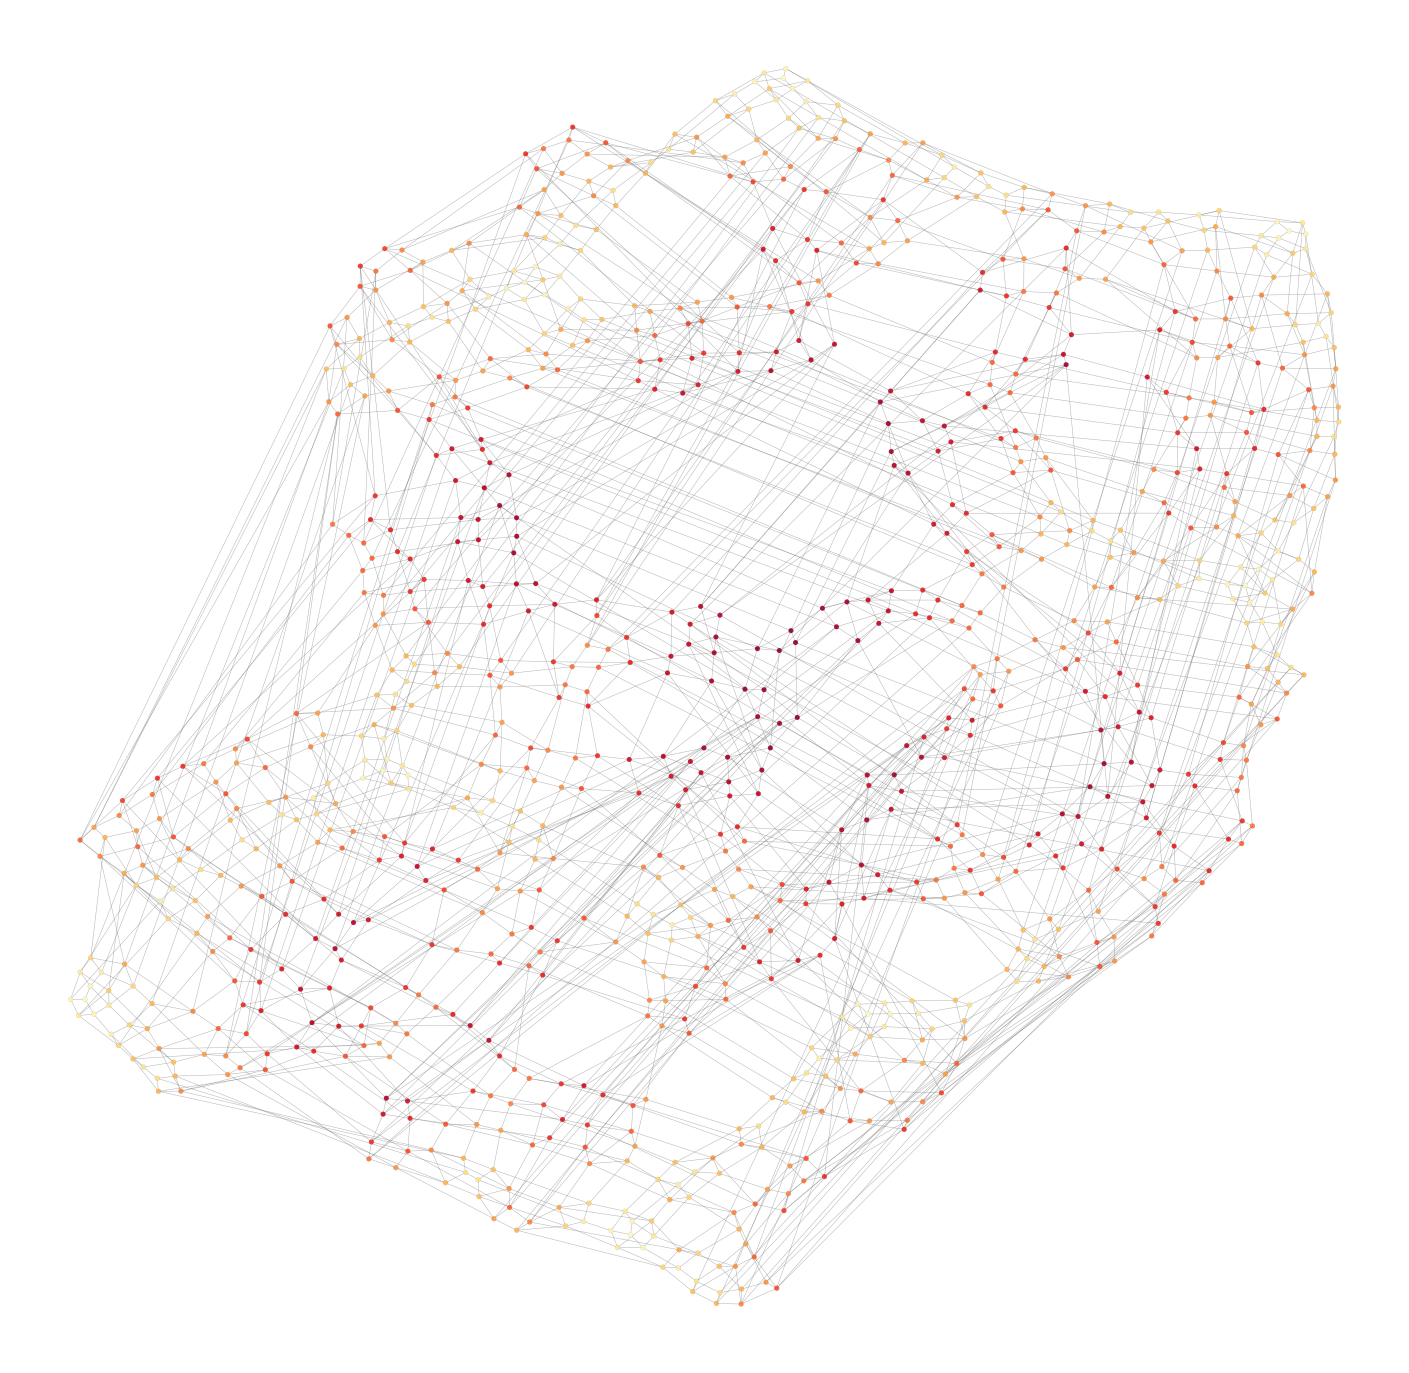

<Figure size 432x288 with 0 Axes>

In [189]:
plt.figure(figsize=(25,25))

nx.draw_networkx_nodes(G, posG, edgecolors = '#696969', linewidths = 0.1, node_color = colours, node_size= 25, alpha = 0.9)
nx.draw_networkx_edges(G, posG, width = 0.5, edge_color = 'dimgrey', alpha = 0.5)

plt.box(False)
plt.show()

plt.savefig('output_plots/2Dlayouts/2DPortrait_node2vec_'+organism+'.pdf')
plt.savefig('output_plots/2Dlayouts/2DPortrait_node2vec_'+organism+'.png')

#### DeepWalk
+ https://github.com/shenweichen/GraphEmbedding
(+ https://github.com/phanein/deepwalk)
+ https://towardsdatascience.com/karate-club-a-python-library-for-graph-representation-learning-e70857112476

In [104]:
#from karateclub import DeepWalk
from ge import DeepWalk

In [105]:
model = DeepWalk(G,
                 walk_length=10,
                 num_walks=80,
                 workers=1,
                )#init model

model.train(window_size=5,
            iter=3) # train model

embeddings_deepwalk = model.get_embeddings()# get embedding vectors

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Learning embedding vectors...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


TypeError: unsupported operand type(s) for +: 'int' and 'str'

--------------------

### PLOT

In [25]:
if dimred == 'tsne':
    posG = posG_complete_tsne_norm
    
elif dimred == 'umap':
    posG = posG_complete_umap_norm
    
elif dimred == 'node2vec':
    
    posG = posG_node2vec
    
elif dimred == 'deepwalk':
    posG = posG_deepwalk
    
elif dimred == 'struc2vec':
    posG = posG_struc2vec

In [26]:
# to resolve background / foreground plotting challenge
# all specific genes are in foreground 

posG_foreground = {}
for k,v in posG.items():
    if k in d_col_all.keys():
        posG_foreground[k] = v
        
colours_foreground = []
for k,v in d_col_all.items():
    if k in posG_foreground.keys():
        colours_foreground.append(v)
        
umap_nodes = get_trace_nodes_2D(posG, l_features, colours, 2.5, opacity_nodes)
umap_nodes_foreground = get_trace_nodes_2D(posG_foreground, l_features, colours_foreground, 5.0, opacity_nodes)
umap_edges_specific= get_trace_edges_from_nodes2D(d_edge_col_, posG, linew=0.65, opac=0.35)

In [33]:
umap_data = [
             umap_edges_specific,
             umap_nodes, umap_nodes_foreground 
            ]

data = umap_data

if dimred == 'umap':
    fname = '2Dlayouts/2DPortrait_umap_'+feature+'_col-'+color_method+'_neigh-'+str(n_neighbors)+'_spr-'+str(spread)+'_mindist-'+str(min_dist)+'_'+organism

elif dimred == 'tsne':
    fname = '2Dlayouts/2DPortrait_tsne_'+feature+'_col-'+color_method+'_prplx-'+str(prplxty)+'_dens-'+str(density)+'_learn-'+str(l_rate)+'_'+'stp-'+str(steps)+'_'+organism
    
path = 'output_plots/'
plot_2D(data,path,fname)

'output_plots/2Dlayouts/2DPortrait_tsne_importance_col-essent_prplx-20_dens-1_learn-200_stp-250_human.html'

In [10]:
# disease (4) specific: 

# to resolve background / foreground plotting challenge
# all specific disease genes are in foreground 

posG_foreground = {}
for k,v in posG.items():
    if k in d_col_all.keys():
        posG_foreground[k] = v
        
colours_foreground = []
for k,v in d_col_all_sorted.items():
    if k in posG_foreground.keys():
        colours_foreground.append(v)
        
l_features_foreground = []
for k,v in d_gene_sym.items():
    if k in posG_foreground.keys():
        l_features_foreground.append(v)

NameError: name 'd_col_all' is not defined

In [158]:
umap_nodes = get_trace_nodes_2D(posG, l_features, colours, 2.5, opacity_nodes)
umap_nodes_foreground = get_trace_nodes_2D(posG_foreground, l_features_foreground, colours_foreground, 5.0, opacity_nodes)

umap_edges_one = get_trace_edges_from_nodes2D(d_edge_col_one, posG, linew=0.65, opac=0.35)
umap_edges_one_glow = get_trace_edges_from_nodelist2D(d_edge_col_one, posG, linew=5.0, opac=0.07)

umap_edges_two = get_trace_edges_from_nodes2D(d_edge_col_two, posG, linew=0.65, opac=0.35)
umap_edges_two_glow = get_trace_edges_from_nodelist2D(d_edge_col_two, posG, linew=5.0, opac=0.07)

umap_edges_mix = get_trace_edges_from_nodes2D(d_edge_col_mix_drop, posG, linew=0.65, opac=0.35)
umap_edges_mix_glow = get_trace_edges_from_nodelist2D(d_edge_col_mix_drop, posG, linew=5.0, opac=0.07)


umap_data = [
             umap_edges_one,
             umap_edges_one_glow,
             
             umap_edges_two,
             umap_edges_two_glow,
            
             umap_edges_mix,
             umap_edges_mix_glow,
    
             umap_nodes,
             umap_nodes_foreground
            ]

data = umap_data

if dimred == 'umap':
    fname = '2Dlayouts/2DPortrait_umap_'+feature+'_col-'+color_method+'_neigh-'+str(n_neighbors)+'_spr-'+str(spread)+'_mindist-'+str(min_dist)+'_'+organism

elif dimred == 'tsne':
    fname = '2Dlayouts/2DPortrait_tsne_'+feature+'_col-'+color_method+'_prplx-'+str(prplxty)+'_dens-'+str(density)+'_learn-'+str(l_rate)+'_'+'stp-'+str(steps)+'_'+organism
    
path = 'output_plots/'
plot_2D(data,path,fname)

'output_plots/2Dlayouts/2DPortrait_umap_funct-dis_col-dismod_neigh-8_spr-6_mindist-0.4_human.html'

### Spring for comparison

#### UMAP EXPORT TO CSV FOR VRNETZER INPUT 

In [119]:
export_to_csv2D(path='_VR_layouts/',
                layout_namespace = layoutcategory+'_'+netlayout, 
                posG = posG_complete_umap_norm, 
                colours = colours)

___
## TOPOGRAPHIC NETWORK MAP 
___

In [20]:
layoutcategory = 'topographic'

### DEFINITION OF Z-PARAMETER

#### OPT 1 | ESSENTIALITY STATE

In [31]:
# Text identifier for file output name
z_feat = 'z-ess'

value_ess = 10
value_noness = 5 
value_notdef = 1

d_ess = {}
for i in essential_genes:
    d_ess[i] = value_ess
d_noness = {}
for i in non_ess_genes:
    d_noness[i] = value_noness
d_notdef = {}
for i in notdefined_genes:
    d_notdef[i] = value_notdef
    
d_alless_unsort = {**d_ess,**d_noness,**d_notdef}
dict_z = {key:d_alless_unsort[key] for key in G.nodes()}

z_list = list(dict_z.values())
z_list_norm = sklearn.preprocessing.minmax_scale(z_list, feature_range=(0, 1.0), axis=0, copy=True)

#### OPT 2 | AVERAGE OF CENTRALITY METRICS

In [27]:
# Text identifier for file output name
z_feat = 'z-centravg'

d_centr = {}
for i,j in df_centralities.iterrows():
    d_centr[str(i)] = (j[0]+j[1]+j[2])/3 # without eigenvalue
    
dict_z  = {key:d_centr[key] for key in G.nodes()}

z_list = list(dict_z.values())
z_list_norm = sklearn.preprocessing.minmax_scale(z_list, feature_range=(0, 1.0), axis=0, copy=True)

 #### OPT 3 | NUMBER OF ASSOCIATED DISEASES (only for human PPI)


In [ ]:
# Text identifier for file output name
z_feat = 'z-disease'

# Get Feature Matrix with genes as rows and columns as diseases
DM_feature  = pd.read_csv('_output_csv/Features_Disease_Dataframe_Human.csv', index_col=0)

# set gene list (= G.nodes())
genes_assoc = []
for i in DM_feature.index:
    genes_assoc.append(str(i))
    
genes_notassoc = [] 
for g in G.nodes():
    if g not in genes_assoc:
        genes_notassoc.append(g)

features_counted = (DM_feature == 1).astype(int).sum(axis=1)
d_features_counted = dict(zip(genes_assoc, list(features_counted)))
        
d_rest = {}
for i in genes_notassoc: 
    d_rest[i] = -20

d_param_unsorted = {**d_features_counted, **d_rest}
dict_z = {key:d_param_unsorted[key] for key in G.nodes()}

z_list = list(dict_z.values())
z_list_norm = sklearn.preprocessing.minmax_scale(z_list, feature_range=(0, 1), axis=0, copy=True)

________

### DIMENSIONALITY REDUCTION

In [ ]:
r_scale = 1.2
umap2D = embed_umap_2D(DM, n_neighbors, spread, min_dist, metric)
posG_complete_umap_norm = get_posG_2D_norm(G, DM, umap2D, r_scale)

posG_land_umap = {}
cc = 0
for k,v in posG_complete_umap_norm.items():
    posG_land_umap[k] = (v[0],v[1],z_list_norm[cc])
    cc+=1
    
umapland_nodes = get_trace_nodes_3D(posG_land_umap, l_feat, colours, node_size, opacity_nodes)
umapland_edges = get_trace_edges_3D(G, posG_land_umap, edge_colordark, opac=edge_opac, linewidth=edge_width)

#### TSNE

In [51]:
# Take 2D coordinates from 2D Portrait and add z-parameter
# required: compute 2D portrait using TSNE 

posG_land_tsne = {}
cc = 0
for k,v in posG_complete_tsne_norm.items():
    posG_land_tsne[k] = (v[0],v[1],z_list_norm[cc])
    cc+=1

#### UMAP

In [ ]:
# Take 2D coordinates from 2D Portrait and add z-parameter
# required: compute 2D portrait using UMAP

posG_land_umap = {}
cc = 0
for k,v in posG_complete_umap_norm.items():
    posG_land_umap[k] = (v[0],v[1],z_list_norm[cc])
    cc+=1

-------------------

### PLOT 

In [ ]:
# Choose a color scheme (e.g. 'light' or 'dark')
scheme = 'light' # or 'dark'

if dimred == 'tsne':
    posGland = posG_land_tsne

elif dimred == 'umap':
    posGland = posG_land_umap
    
umap_nodes = get_trace_nodes_3D(posGland, l_features, colours, 
                                size3d, 
                                #1.0,
                                opacity_nodes)


##################################
# Un/comment to add Node Glow 
##################################
umap_nodes_glow = get_trace_nodes_3D(posGland, l_features, colours, nodesglow_diameter, nodesglow_transparency) 

if scheme == 'light':
    umap_edges = get_trace_edges_3D(G, posGland, edge_colorlight, opac = 0.05, linewidth=0.5)
elif scheme == 'dark':
    umap_edges = get_trace_edges_3D(G, posGland, edge_colordark, opac = 0.05, linewidth=0.5)
    #umap_specificedges = get_trace_edges_from_nodelist3D(list(d_edge_col_.keys()), posG_land_umap, 'dimgrey', 0.1)

umap_data = [umap_edges, #umap_specificedges,
             umap_nodes_glow,
             umap_nodes]

data = umap_data

if dimred == 'umap':
    fname = 'output_plots/3Dlayouts/TopographicMap_umap_'+feature+'_col-'+color_method+'_'+z_feat+'_neigh-'+str(n_neighbors)+'_spr-'+str(spread)+'_mindist-'+str(min_dist)+'_'+organism

elif dimred == 'tsne':
    fname = 'output_plots/3Dlayouts/TopographicMap_tsne_'+feature+'_col-'+color_method+'_'+z_feat+'_prplx-'+str(prplxty)+'_dens-'+str(density)+'_learn-'+str(l_rate)+'_'+'stp-'+str(steps)+'_'+organism
    
    
plot_3D(data, fname, scheme)#, annot_light)

#### UMAP EXPORT TO CSV FOR VRNETZER INPUT 

In [ ]:
export_to_csv3D(path = '_VR_Layouts/',
                layout_namespace = layoutcategory+'_'+feature, 
                posG = posG_land_umap, 
                colours = colours)

____
## 3D PORTRAITS
____

In [372]:
layoutcategory = '3D'

### DIMENSIONALITY REDUCTION

#### TSNE 

In [371]:
%%time 

# Specifying dim. red. method for file name
dimred = 'tsne'

prplxty = 8
density = 12
l_rate = 200
steps = 250
metric = 'cosine'

#r_scale = 1.05
tsne_3D = embed_tsne_3D(DM, prplxty, density, l_rate, steps, metric)
posG_3D_tsne = get_posG_3D(genes, tsne_3D)
posG_3D_complete_tsne_norm = get_posG_3D_norm(G, DM, tsne_3D)#, r_scale)

CPU times: user 1min 39s, sys: 2.14 s, total: 1min 41s
Wall time: 18.4 s


#### UMAP

In [377]:
%%time 

# Specifying dim. red. method for file name
dimred = 'umap'

n_neighbors = 10
spread = 10.0
min_dist = 0.9
metric='cosine'

umap_3D = embed_umap_3D(DM, n_neighbors, spread, min_dist, metric)
posG_3D_umap = get_posG_3D(genes, umap_3D)
posG_3D_complete_umap_norm = get_posG_3D_norm(G, DM, umap_3D)# r_scale)

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1331: RuntimeWarning:

divide by zero encountered in power



CPU times: user 19.1 s, sys: 1.46 s, total: 20.5 s
Wall time: 15.2 s


-------------------

### PLOT 

In [413]:
# adding disease annotations 

annot_light = annotation_disease(list(posG_disease_genes_one.values())[0:2],[disease_one, disease_two], [node_col_one,node_col_two], mode = 'light')

In [ ]:
def get_trace_edges_from_nodelist3D(l_genes, posG, col, opac=0.2):
    '''
    Get trace of edges for plotting in 3D only for specific edges. 
    Input: 
    - G = Graph
    - posG = dictionary with nodes as keys and coordinates as values.
    - color = string; specific color to highlight specific edges 
    
    Return a trace of specific edges. 
    '''
    l_spec_edges = [(u,v)for u,v in G.edges(l_genes) if u in l_genes and v in l_genes]
    #l_spec_edges = [(u,v)for u,v in G.edges(l_genes) if u in l_genes or v in l_genes]
    
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in l_spec_edges:
            x0, y0,z0 = posG[edge[0]]
            x1, y1,z1 = posG[edge[1]]
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_z.append(z0)
            edge_z.append(z1)
            edge_z.append(None)
            
    trace_edges = pgo.Scatter3d(
                        x = edge_x, 
                        y = edge_y, 
                        z = edge_z,
                        mode = 'lines', hoverinfo='none',
                        line = dict(width = 1.0, color = [col]*len(edge_x)),
                        opacity = opac
                )
    return trace_edges

In [416]:
# Choose a color scheme (e.g. 'light' or 'dark')
scheme = 'light'
#scheme = 'dark'

if dimred == 'tsne':
    posG_3D = posG_3D_complete_tsne_norm
    
elif dimred == 'umap':
    posG_3D = posG_3D_complete_umap_norm

umap_nodes = get_trace_nodes_3D(posG_3D, l_features, colours, 
                                1.0, #size3d, #1.0
                                opacity_nodes)

##################################
# Un/comment to add Node Glow 
##################################
umap_nodes_glow = get_trace_nodes_3D(posG_3D, l_features, colours, nodesglow_diameter, nodesglow_transparency) 

#if scheme == 'light':
#    umap_edges = get_trace_edges_3D(G, posG_3D_complete_umap_norm, edge_colorlight, opac = 0.05, linewidth=0.5)
#elif scheme == 'dark':
#    umap_edges = get_trace_edges_3D(G, posG_3D_complete_umap_norm, edge_color, opac = 0.05, linewidth=0.5)

umap_edges_specific_one = get_trace_edges_from_nodelist3D(list(disease_genes_one), posG_3D, node_col_one, opac=0.5)
umap_edges_specific_two = get_trace_edges_from_nodelist3D(list(disease_genes_two), posG_3D, node_col_two, opac=0.5)
#umap_edges_specific_three = get_trace_edges_from_nodelist3D(list(disease_genes_three), posG_3D, node_col_three, opac=0.05)
#umap_edges_specific_four = get_trace_edges_from_nodelist3D(list(disease_genes_four), posG_3D, node_col_four, opac=0.05)

umap_data = [umap_edges_specific_one,
             umap_edges_specific_two, 
             #umap_edges_specific_three,
             #umap_edges_specific_four,
             #umap_edges,
             umap_nodes_glow,         
             umap_nodes]

data = umap_data

if dimred == 'umap':
    fname = 'output_plots/3Dlayouts/3DPortrait_umap_'+feature+'_col-'+color_method+'_neigh-'+str(n_neighbors)+'_spr-'+str(spread)+'_mindist-'+str(min_dist)+'_'+organism

elif dimred == 'tsne':
    fname = 'output_plots/3Dlayouts/3DPortrait_tsne_'+feature+'_col-'+color_method+'_prplx-'+str(prplxty)+'_dens-'+str(density)+'_learn-'+str(l_rate)+'_'+'stp-'+str(steps)+'_'+organism
    
    
plot_3D(data, fname, scheme, annot_light)

'output_plots/3Dlayouts/3DPortrait_umap_funct-dis_col-dismod_neigh-10_spr-10.0_mindist-0.9_human.html'

#### UMAP EXPORT TO CSV FOR VRNETZER INPUT 

In [175]:
posG_3D_complete_umap_norm_num = {}
for node_id,coords in posG_3D_complete_umap_norm.items():
    posG_3D_complete_umap_norm_num[only_numerics(node_id)]=coords
    
export_to_csv3D(path='_VR_layouts/',
                layout_namespace = layoutcategory+'_'+netlayout, 
                posG = posG_3D_complete_umap_norm_num, 
                colours = colours)

----
## GEODESIC NETWORK MAP 
----

In [57]:
layoutcategory = 'geodesic'

### DEFINITION OF RADIUS PARAMETER

#### OPT 1 | GENE LIST (for human PPI only)

In [235]:
#################
# EXAMPLE : PATIENT VARIANTS + SEEDS 
#################

# Text identifier for file output name
rad_param = 'r-varseeds'

# Load Gene Information for Gene lists 
variants = pd.read_csv('input/julias_variants_mod.txt')
variant_list = [str(i) for i in list(variants['variants'])]
variant_sym = pd.read_csv('input/julias_variants_sym.txt')
genes_sym_list = [str(i) for i in list(variant_sym['variant_sym'])]
d_gene_sym_variants = dict(zip(variant_list,genes_sym_list))

df_seeds = pd.read_csv('input/seeds_from_genelists.txt')
df_seeds.columns = ['seeds']
df_seeds_z = pd.read_csv('input/seeds_from_zNumbers.txt', sep='\n')
seeds_list = [str(i) for i in list(df_seeds['seeds'])]

d_seeds_idsym = {}
for k,v in d_gene_sym.items():
    for i in seeds_list:
        if v == i:
            d_seeds_idsym[k]=i
seed_list = list(d_seeds_idsym.keys())

FM_BP = pd.read_csv('_output_csv/Features_GO_BiolProc_Dataframe_human.csv', index_col=0)
bioproc_list = list(FM_BP.index)

# From obtained Gene lists select those to be mapped onto different shells 
# select genes for shells 
shell_one = variant_list
shell_two = seed_list
shell_three = [str(i) for i in bioproc_list]

small_rad = 1
mid_rad = 5
large_rad = 30
outershell_rad = 50

d_param = {}
for i in G.nodes():
    if str(i) in variant_list:
        d_param[str(i)] = small_rad
    elif i in seed_list:
        d_param[str(i)] = mid_rad 
    elif int(i) in bioproc_list:
        d_param[str(i)] = large_rad 
    else:
        d_param[str(i)] = outershell_rad

genes_rad = variant_list + seed_list + bioproc_list

# check how many shells of spheres there will be :
print('Number of Spherical Shells:', len(set(d_param.values())))


# Specifying coloring based on genes on different shells 
d_nodecol = d_clos 
d_colours = color_nodes_from_dict(G, d_nodecol, palette = col_pal)

d_colours_spec_genes = {}
for k,v in d_colours.items():
    if k in shell_one:
        d_colours_spec_genes[k]='#8b0000' 
    elif k in shell_two:
        d_colours_spec_genes[k]='#FF4500' 
    elif k in shell_three:
        d_colours_spec_genes[k]=v
    else: 
        d_colours_spec_genes[k]='#d3d3d3'

d_colours_spec_genes_sort = {key:d_colours_spec_genes[key] for key in G.nodes()}
colours = list(d_colours_spec_genes_sort.values())

Number of Spherical Shells: 4


#### OPT 2 | ESSENTIALITY

In [56]:
# Text identifier for file output name
rad_param = 'r-essent'

small_rad = 1
mid_rad = 10
outershell_rad = 20

d_ess_scores = {}
for i in G.nodes():
    if i in essential_genes:
        d_ess_scores[i] = small_rad
    elif i in non_ess_genes:
        d_ess_scores[i] = mid_rad
    elif str(i) in notdefined_genes:
        d_ess_scores[i] = outershell_rad
        
d_param = d_ess_scores
genes_rad = list(G.nodes())

# check how many shells of spheres there will be :
print('Number of Spherical Shells:', len(set(d_param.values())))


# Specifying coloring based on genes on different shells 
d_colours_spec_genes = {}
for k in G.nodes():
    if k in essential_genes:
        d_colours_spec_genes[k]='#0080bf' 
    elif k in non_ess_genes:
        d_colours_spec_genes[k]='#95dcff' 
    else: 
        d_colours_spec_genes[k]='#d3d3d3'

d_colours_spec_genes_sort = {key:d_colours_spec_genes[key] for key in G.nodes()}
colours = list(d_colours_spec_genes_sort.values())

Number of Spherical Shells: 3


______

### DIMENSIONALITY REDUCTION 

#### UMAP

In [58]:
%%time 

n_neighbors = 50 # balance between local and global structure in the data
spread = 1.0
min_dist = 0.1 # defines how dense points are stacked together 
metric='cosine'

umap_sphere = embed_umap_sphere(DM, n_neighbors, spread, min_dist, metric)

CPU times: user 1min 24s, sys: 1.47 s, total: 1min 25s
Wall time: 16.9 s


In [59]:
%%time 

radius = 40 

posG_sphere = get_posG_sphere(genes, umap_sphere)
posG_complete_sphere_norm = get_posG_sphere_norm(G, genes_rad, umap_sphere, d_param, radius)

CPU times: user 2.31 s, sys: 6.65 ms, total: 2.32 s
Wall time: 2.33 s


--------------------

### PLOT

In [60]:
# Choose a color scheme (e.g. 'light' or 'dark')
scheme = 'light'
#scheme = 'dark'

umap_nodes = get_trace_nodes_3D(posG_complete_sphere_norm, l_features, colours, 
                                size3d, #1.0,
                                opacity_nodes)

##################################
# Un/comment to add Node Glow 
##################################
umap_nodes_glow = get_trace_nodes_3D(posG_complete_sphere_norm, l_features, colours, nodesglow_diameter, nodesglow_transparency) 

if scheme == 'light':
    umap_edges = get_trace_edges_3D(G, posG_complete_sphere_norm, edge_colorlight, opac = 0.05, linewidth=0.5)
elif scheme == 'dark':
    umap_edges = get_trace_edges_3D(G, posG_complete_sphere_norm, edge_colordark, opac = 0.05, linewidth=0.5)

    
#specific edges:
#umap_edges_spec = get_trace_edges_from_nodelist3D(list(d_edge_col_.keys()),posG_complete_sphere_norm, node_col, 0.1)
#umap_data_edges_spec = [umap_edges_spec,umap_nodes_transparent, umap_nodes]


umap_data = [umap_edges,
             #umap_nodes_glow,
             umap_nodes]

data = umap_data
fname = 'output_plots/3Dlayouts/GeodesicMap_umap_'+feature+'_col-'+color_method+'_neigh-'+str(n_neighbors)+'_spr-'+str(spread)+'_mindist-'+str(min_dist)+'_'+organism
    
plot_3D(data, fname, scheme)#, annot_light)

'output_plots/3Dlayouts/GeodesicMap_umap_importance_col-clos_neigh-50_spr-1.0_mindist-0.1_yeast.html'

#### UMAP EXPORT TO CSV FOR VRNETZER INPUT 

In [243]:
posG_complete_sphere_norm_num = {}
for node_id,coords in posG_complete_sphere_norm.items():
    posG_complete_sphere_norm_num[only_numerics(node_id)]=coords
    
export_to_csv3D(path='_VR_layouts/',
                layout_namespace = layoutcategory+'_'+netlayout, 
                posG = posG_complete_sphere_norm, 
                colours = colours)

# Work in progress

In [ ]:
def nodecolor_settings(color_method):

    if color_method == 'closeness':

        # Text identifier for file output name
        color_method = 'clos'

        # choose a dictionary 
        d_clos = {}
        for k,v in d_centralities.items():
        d_clos[k] = v[1]

        d_nodecol = d_clos 

        # choose a color palette 
        col_pal = 'YlOrRd'

        # assigning colors to nodes based on previous settings
        d_colours = color_nodes_from_dict(G, d_nodecol, palette = col_pal)
        colours = list(d_colours.values())
        edge_color = '#d3d3d3'
        
        
    elif color_method == 'hubs':
 
        # Choose color of hubs 
        node_col = '#008a00' 
        neigh_col_nodes = '#B9D770' 

        # Identify hubs (using tresholds) 
        min_treshold = 1000
        max_treshold = 5000
        hubs,neighs = get_hubs(G, max_treshold, min_treshold)
        colours = list(color_nodes_hubs(G, hubs, neighs, node_col, neigh_col_nodes).values())
        print('Selected No. of Hubs: ', len(hubs))

        # Get edges from hubs 
        d_edge_col_ = color_edges_from_nodelist(G, list(hubs.keys()), node_col)
        # Get rest edges 
        rest_col_edges = '#d3d3d3'
        d_rest_edges={}
        for e in G.edges():
            if e not in d_edge_col_.keys():
                d_rest_edges[e] = rest_col_edges

        d_all_edges = {**d_edge_col_, **d_rest_edges}
        d_all_edges_sort = {key:d_all_edges[key] for key in G.edges()}
        edge_color = list(d_all_edges_sort.values())
    
    elif color_method == 'essentiality':
    
        # Choose colors 
        node_col = '#00abff' 
        undefined_col = '#d3d3d3'
        rest_col_nodes = '#d3d3d3'
        rest_col_edges = '#f5f5f5'

        d_col_all_sorted = color_nodes_from_list(G, essential_genes, node_col)
        colours = list(d_col_all_sorted.values())

        # Choose edges to highlight that link inbetween 2 essential genes only 
        # or if one essential node is enough to produce a highlighted link 
        d_edge_col_ = color_edges_from_nodelist_and(G, essential_genes, node_col)

        # Rest edges 
        d_rest_edges={}
        for e in G.edges():
            if e not in d_edge_col_.keys():
                d_rest_edges[e] = rest_col_edges

        d_all_edges = {**d_edge_col_, **d_rest_edges}
        d_all_edges_sort = {key:d_all_edges[key] for key in G.edges()}
        edge_color = list(d_all_edges_sort.values())
    
    elif color_method == 'nodelist'
    
    
    else: 
        print('Please choose a valid color method.')
    
    
    
    
    return colours, edge_color
    
    
    


# WORK IN PROGRESS 

In [ ]:
class NetworkPortrait(self, dimension, embedding_method):
    
    def __init__(self, dimension, embedding_method):
        self.dimension = dimension
        self.embedding_method = embedding_method
    
    def node_positions(embedding_method):
        
        
    
        